In [ ]:
# Create your first MLP in Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
data = data[['AT', 'AP', 'AH', 'AFDP','GTEP','TIT','TAT','CDP','CO','NOX','TEY']]
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006,-0.207495
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744,0.146939
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061,-0.110272
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299,0.717995
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496,0.977042
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636,0.891587
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888,-0.720356
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103,0.988473
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743,-0.541751
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,-0.231636,0.009888,-0.169103,0.316743,1.000000,-0.102631


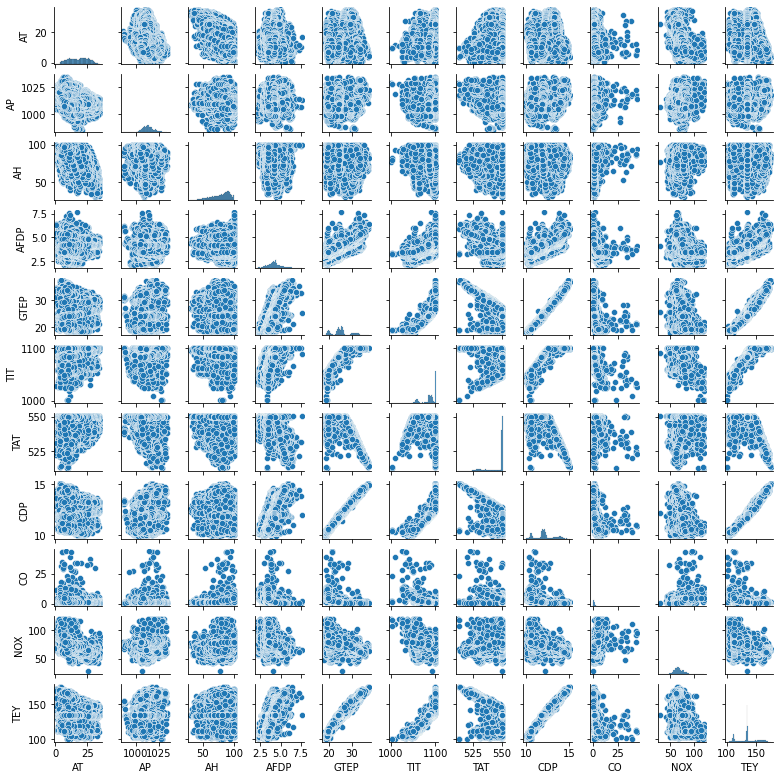

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
#Pair Plot
sn.pairplot(data, height=1) # height is size of the plot

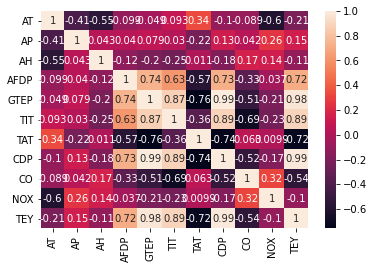

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True);

In [ ]:
# seperate the independent and target variable on training data

X=data.iloc[:,0:10]
Y=data.iloc[:,10]

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False False False False  True  True False  True False False]
Feature Ranking:  [3 8 7 5 1 1 2 1 6 4]


(array([1.710e+02, 1.317e+03, 2.388e+03, 4.698e+03, 3.924e+03, 1.392e+03,
        8.300e+02, 3.050e+02, 1.000e+01, 4.000e+00]),
 array([2.0874 , 2.63972, 3.19204, 3.74436, 4.29668, 4.849  , 5.40132,
        5.95364, 6.50596, 7.05828, 7.6106 ]),
 <a list of 10 Patch objects>)

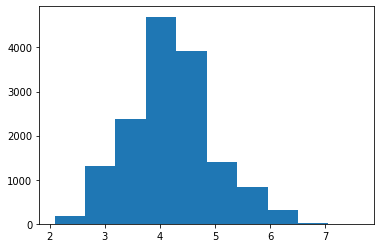

In [ ]:
import matplotlib.pyplot as plt

plt.hist((data.AFDP))

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <a list of 10 Patch objects>)

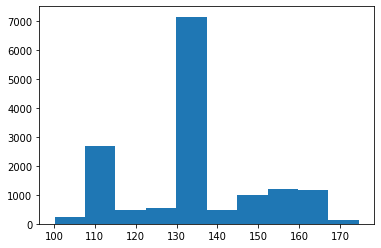

In [ ]:
plt.hist((data.TEY))

In [ ]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [ ]:
x_train

array([[-0.0483839 ,  0.34450707, -1.63503785, ..., -0.11636585,
        -0.20134414,  0.55486279],
       [-0.98413494,  2.48787226,  0.38832016, ...,  1.79036542,
        -0.00982807,  0.36421853],
       [-1.16925521,  0.7043421 ,  1.14134212, ...,  1.78945875,
        -0.63261354,  0.9724645 ],
       ...,
       [-0.69954746,  0.54789208, -0.51511826, ...,  1.26540232,
        -0.49556607, -0.24991867],
       [ 1.12133786, -0.32822799, -0.9774989 , ..., -0.46180789,
        -0.39392341, -0.71735444],
       [ 0.10148917, -0.12484298,  0.9484968 , ..., -1.5570677 ,
         1.0584183 , -0.72904033]])

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=10,epochs=150,validation_split=0.33)

Epoch 1/150
806/806 [==============================] - 2s 2ms/step - loss: 17987.0215 - accuracy: 0.0000e+00 - val_loss: 18096.6406 - val_accuracy: 0.0000e+00
Epoch 2/150
806/806 [==============================] - 1s 2ms/step - loss: 17963.8398 - accuracy: 0.0000e+00 - val_loss: 18096.5000 - val_accuracy: 0.0000e+00
Epoch 3/150
806/806 [==============================] - 1s 2ms/step - loss: 17963.7852 - accuracy: 0.0000e+00 - val_loss: 18096.4746 - val_accuracy: 0.0000e+00
Epoch 4/150
806/806 [==============================] - 1s 2ms/step - loss: 17963.7695 - accuracy: 0.0000e+00 - val_loss: 18096.4648 - val_accuracy: 0.0000e+00
Epoch 5/150
806/806 [==============================] - 1s 2ms/step - loss: 17963.7754 - accuracy: 0.0000e+00 - val_loss: 18096.4629 - val_accuracy: 0.0000e+00
Epoch 6/150
806/806 [==============================] - 1s 2ms/step - loss: 17963.7598 - accuracy: 0.0000e+00 - val_loss: 18096.4590 - val_accuracy: 0.0000e+00
Epoch 7/150
806/806 [=========================

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

94/94 [==============================] - 0s 2ms/step - loss: 17918.4277 - accuracy: 0.0000e+00
accuracy: 0.00%


In [ ]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 3s 2ms/step - loss: 18290.0234 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0234 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0215 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0312 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0156 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 18290.0254 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 7/100
1008/1008 [===========

In [ ]:
# Visualize training history

# list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

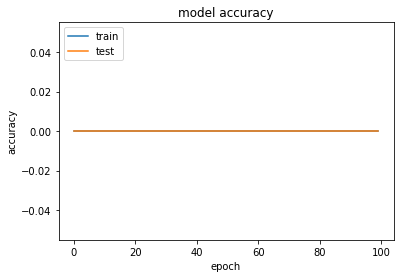

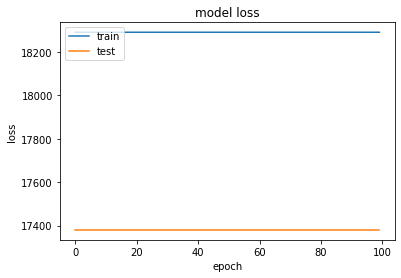

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=10, score=0.000, total=  11.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=10, score=0.000, total=  11.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.4s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=10, score=0.000, total=  11.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   33.5s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=10, score=0.000, total=  21.3s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   54.8s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=10, score=0.000, total=  21.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=50, score=0.000, total= 1.4min
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.6min remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=50, score=0.000, total= 1.4min
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.0min remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=50, score=0.000, total= 1.4min
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.4min remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  52.6s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  6.3min remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=50, score=0.000, total=  53.2s
[CV] batch_size=10, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=10, epochs=100, score=0.000, total= 1.7min
[CV] batch_size=10, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=10, epochs=100, score=0.000, total= 2.4min
[CV] batch_size=10, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=10, epochs=100, score=0.000, total= 2.4min
[CV] batch_size=10, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=10, epochs=100, score=0.000, total= 2.4min
[CV] batch_size=10, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=10, epochs=100, score=0.000, total= 1.7min
[CV] batch_size=20, epochs=10 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=20, epochs=10, score=0.000, total=   6.0s
[CV] batch_size=20, epochs=10 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=20, epochs=10, score=0.000, total=   5.9s
[CV] batch_size=20, epochs=10 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=20, epochs=10, score=0.000, total=  10.9s
[CV] batch_size=20, epochs=10 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=20, epochs=10, score=0.000, total=  11.3s
[CV] batch_size=20, epochs=10 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=20, epochs=10, score=0.000, total=   5.9s
[CV] batch_size=20, epochs=50 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=20, epochs=50, score=0.000, total=  26.8s
[CV] batch_size=20, epochs=50 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=20, epochs=50, score=0.000, total=  41.7s
[CV] batch_size=20, epochs=50 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=20, epochs=50, score=0.000, total=  41.7s
[CV] batch_size=20, epochs=50 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=20, epochs=50, score=0.000, total=  27.3s
[CV] batch_size=20, epochs=50 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=20, epochs=50, score=0.000, total=  27.2s
[CV] batch_size=20, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=20, epochs=100, score=0.000, total= 1.4min
[CV] batch_size=20, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=20, epochs=100, score=0.000, total= 1.4min
[CV] batch_size=20, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=20, epochs=100, score=0.000, total=  53.6s
[CV] batch_size=20, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=20, epochs=100, score=0.000, total=  54.5s
[CV] batch_size=20, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=20, epochs=100, score=0.000, total=  53.7s
[CV] batch_size=40, epochs=10 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=40, epochs=10, score=0.000, total=   5.8s
[CV] batch_size=40, epochs=10 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=40, epochs=10, score=0.000, total=   3.3s
[CV] batch_size=40, epochs=10 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=40, epochs=10, score=0.000, total=   3.2s
[CV] batch_size=40, epochs=10 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=40, epochs=10, score=0.000, total=   3.3s
[CV] batch_size=40, epochs=10 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=40, epochs=10, score=0.000, total=   3.3s
[CV] batch_size=40, epochs=50 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=40, epochs=50, score=0.000, total=  21.1s
[CV] batch_size=40, epochs=50 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=40, epochs=50, score=0.000, total=  14.0s
[CV] batch_size=40, epochs=50 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=40, epochs=50, score=0.000, total=  21.1s
[CV] batch_size=40, epochs=50 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=40, epochs=50, score=0.000, total=  14.0s
[CV] batch_size=40, epochs=50 ........................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=40, epochs=50, score=0.000, total=  21.1s
[CV] batch_size=40, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=40, epochs=100, score=0.000, total=  42.0s
[CV] batch_size=40, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=40, epochs=100, score=0.000, total=  41.6s
[CV] batch_size=40, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=40, epochs=100, score=0.000, total=  41.7s
[CV] batch_size=40, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=40, epochs=100, score=0.000, total=  27.3s
[CV] batch_size=40, epochs=100 .......................................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ........... batch_size=40, epochs=100, score=0.000, total=  27.6s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 31.5min finished
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
